**Created by Gael AHOUANVOEDO**

**🚀Exploring Weather Trends 📊 Udacicty Data Analyst NanoDegree 📈**

**04 June 2022**

# **<center><span style="color:#fd7b12;">🚀EXPLORING WEATHER TRENDS 🚀   </span></center>**
## <center>For more information you can contact me at +221781203911👍</center>

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analysis](#4)
- [5. Conclusions](#5)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

**In this project, I will analyze local and global temperature data and compare Dakar temperature trends to global global temperature trends.** 

**The goal will be to create a visualization and prepare an essay describing the similarities and differences between global temperature trends and temperature trends in the major city closest to where I live.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

### <span style="color:#e76f51;"> Useful libraries </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;">Data Wrangling </span></center>**

<a id="3.1"></a>
## <span style="color:#e76f51;"> Import given Dataset </span>

### <span style="color:#e76f51;"> SQL Querry </span>

**To import the different databases we used the following codes**

`SELECT * FROM city_data`

`SELECT * FROM global_data`

`SELECT * FROM city_list`

### <span style="color:#e76f51;"> City Data </span>

In [2]:
city_data = pd.read_csv('city_data.csv')
city_data.reset_index(drop=True)
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


### <span style="color:#e76f51;"> Global Data </span>

In [3]:
global_data = pd.read_csv('global_data.csv')
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


### <span style="color:#e76f51;"> City List </span>

In [4]:
city_list = pd.read_csv('city_list.csv')
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


<a id="3.1"></a>
## <span style="color:#e76f51;"> Creation of Dakar Dataset</span>

### <span style="color:#e76f51;"> Filter data relating to Dakar only </span>

In [5]:
dakar_temp = city_data.query('city=="Dakar"')
dakar_temp.head(3)

,year,city,country,avg_temp
17336,1849,Dakar,Senegal,24.08
17337,1850,Dakar,Senegal,24.08
17338,1851,Dakar,Senegal,24.26


In [6]:
dakar_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 17336 to 17500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   city      165 non-null    object 
 2   country   165 non-null    object 
 3   avg_temp  158 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


### <span style="color:#e76f51;"> Filter missing data </span>

In [7]:
dakar_temp_null = dakar_temp.query('avg_temp.isnull()')
dakar_temp_null

,year,city,country,avg_temp
17339,1852,Dakar,Senegal,NaN
17340,1853,Dakar,Senegal,NaN
17341,1854,Dakar,Senegal,NaN
17342,1855,Dakar,Senegal,NaN
17354,1867,Dakar,Senegal,NaN
17358,1871,Dakar,Senegal,NaN
17359,1872,Dakar,Senegal,NaN


### <span style="color:#e76f51;"> Filter data after 1872 </span>

In [8]:
dakar_temp_val = dakar_temp.query('year > 1872')
dakar_temp_val.head(3)

,year,city,country,avg_temp
17360,1873,Dakar,Senegal,26.27
17361,1874,Dakar,Senegal,23.83
17362,1875,Dakar,Senegal,23.75


### <span style="color:#e76f51;"> Add global temperature column </span>

In [9]:
global_data.rename(columns={'avg_temp' : 'global_temp'},inplace=True)
dakar_temp_val = dakar_temp_val.merge(global_data, how='inner', on='year')
dakar_temp_val.head(3)

,year,city,country,avg_temp,global_temp
0,1873,Dakar,Senegal,26.27,8.35
1,1874,Dakar,Senegal,23.83,8.43
2,1875,Dakar,Senegal,23.75,7.86


### <span style="color:#e76f51;"> Add rolling columns </span>

In [10]:
avg_num = 10
dakar_temp_val['rolling_temp'] = dakar_temp_val['avg_temp'].rolling(window = avg_num ).mean()
dakar_temp_val['global_rolling_temp'] = dakar_temp_val['global_temp'].rolling(window = avg_num ).mean()

In [11]:
dakar_temp_val.head(20)

,year,city,country,avg_temp,global_temp,rolling_temp,global_rolling_temp
0,1873,Dakar,Senegal,26.27,8.35,NaN,NaN
1,1874,Dakar,Senegal,23.83,8.43,NaN,NaN
2,1875,Dakar,Senegal,23.75,7.86,NaN,NaN
3,1876,Dakar,Senegal,24.40,8.08,NaN,NaN
4,1877,Dakar,Senegal,24.24,8.54,NaN,NaN
5,1878,Dakar,Senegal,24.50,8.83,NaN,NaN
6,1879,Dakar,Senegal,24.08,8.17,NaN,NaN
7,1880,Dakar,Senegal,24.13,8.12,NaN,NaN
8,1881,Dakar,Senegal,24.28,8.27,NaN,NaN
9,1882,Dakar,Senegal,24.45,8.13,24.393,8.278


<a id="3.1"></a>
## <span style="color:#e76f51;"> Creation of Nouakchott Dataset</span>

### <span style="color:#e76f51;"> Filter data relating to Nouakchott only </span>

In [12]:
nouakchott_temp = city_data.query('city=="Nouakchott"')
nouakchott_temp.head(3)

,year,city,country,avg_temp
46604,1849,Nouakchott,Mauritania,26.48
46605,1850,Nouakchott,Mauritania,26.58
46606,1851,Nouakchott,Mauritania,26.85


In [13]:
nouakchott_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 46604 to 46768
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   city      165 non-null    object 
 2   country   165 non-null    object 
 3   avg_temp  161 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


### <span style="color:#e76f51;"> Filter missing data </span>

In [14]:
nouakchott_temp_null = nouakchott_temp.query('avg_temp.isnull()')
nouakchott_temp_null

,year,city,country,avg_temp
46607,1852,Nouakchott,Mauritania,NaN
46608,1853,Nouakchott,Mauritania,NaN
46609,1854,Nouakchott,Mauritania,NaN
46610,1855,Nouakchott,Mauritania,NaN


### <span style="color:#e76f51;"> Filter data after 1872 </span>

In [15]:
nouakchott_temp_val = nouakchott_temp.query('year > 1872').reset_index()
nouakchott_temp_val.head(3)

,index,year,city,country,avg_temp
0,46628,1873,Nouakchott,Mauritania,26.52
1,46629,1874,Nouakchott,Mauritania,26.26
2,46630,1875,Nouakchott,Mauritania,26.23


### <span style="color:#e76f51;"> Add Nouakchott rolling columns </span>

In [16]:
avg_num = 10
nouakchott_temp_val['rolling_temp'] = nouakchott_temp_val['avg_temp'].rolling(window = avg_num ).mean()

In [17]:
nouakchott_temp_val.head(20)

,index,year,city,country,avg_temp,rolling_temp
0,46628,1873,Nouakchott,Mauritania,26.52,NaN
1,46629,1874,Nouakchott,Mauritania,26.26,NaN
2,46630,1875,Nouakchott,Mauritania,26.23,NaN
3,46631,1876,Nouakchott,Mauritania,26.87,NaN
4,46632,1877,Nouakchott,Mauritania,26.73,NaN
5,46633,1878,Nouakchott,Mauritania,27.03,NaN
6,46634,1879,Nouakchott,Mauritania,26.52,NaN
7,46635,1880,Nouakchott,Mauritania,26.28,NaN
8,46636,1881,Nouakchott,Mauritania,27.09,NaN
9,46637,1882,Nouakchott,Mauritania,26.85,26.638


<a id="3.1"></a>
## <span style="color:#e76f51;"> Creation of Bamako Dataset</span>

### <span style="color:#e76f51;"> Filter data relating to Bamako only </span>

In [18]:
bamako_temp = city_data.query('city=="Bamako"')
bamako_temp.head(3)

,year,city,country,avg_temp
6013,1849,Bamako,Mali,26.43
6014,1850,Bamako,Mali,26.43
6015,1851,Bamako,Mali,26.56


In [19]:
bamako_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 6013 to 6177
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   city      165 non-null    object 
 2   country   165 non-null    object 
 3   avg_temp  158 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


### <span style="color:#e76f51;"> Filter missing data </span>

In [20]:
bamako_temp_null = bamako_temp.query('avg_temp.isnull()')
bamako_temp_null

,year,city,country,avg_temp
6016,1852,Bamako,Mali,NaN
6017,1853,Bamako,Mali,NaN
6018,1854,Bamako,Mali,NaN
6019,1855,Bamako,Mali,NaN
6031,1867,Bamako,Mali,NaN
6035,1871,Bamako,Mali,NaN
6036,1872,Bamako,Mali,NaN


### <span style="color:#e76f51;"> Filter data after 1872 </span>

In [21]:
bamako_temp_val = bamako_temp.query('year > 1872').reset_index()
bamako_temp_val.head(3)

,index,year,city,country,avg_temp
0,6037,1873,Bamako,Mali,26.54
1,6038,1874,Bamako,Mali,26.34
2,6039,1875,Bamako,Mali,25.96


### <span style="color:#e76f51;"> Add Bamako rolling columns </span>

In [22]:
avg_num = 10
bamako_temp_val['rolling_temp'] = bamako_temp_val['avg_temp'].rolling(window = avg_num ).mean()

In [23]:
bamako_temp_val.head(20)

,index,year,city,country,avg_temp,rolling_temp
0,6037,1873,Bamako,Mali,26.54,NaN
1,6038,1874,Bamako,Mali,26.34,NaN
2,6039,1875,Bamako,Mali,25.96,NaN
3,6040,1876,Bamako,Mali,26.15,NaN
4,6041,1877,Bamako,Mali,26.60,NaN
5,6042,1878,Bamako,Mali,26.81,NaN
6,6043,1879,Bamako,Mali,26.34,NaN
7,6044,1880,Bamako,Mali,26.72,NaN
8,6045,1881,Bamako,Mali,27.05,NaN
9,6046,1882,Bamako,Mali,26.68,26.519


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Dataset:</u></b><br>
 
* <i> There are total of <b><u>7 columns </u></b>and <b><u>141  rows </u></b>in the dataset.</i><br>
* <i> Dataset contains <b><u>969 observation</u></b> with <b><u>18 missing values</u></b>.</i><br>

## <span style="color:#e76f51;"> Quick view of the Dataset </span>

In [24]:
dakar_temp_val.head(5)

,year,city,country,avg_temp,global_temp,rolling_temp,global_rolling_temp
0,1873,Dakar,Senegal,26.27,8.35,NaN,NaN
1,1874,Dakar,Senegal,23.83,8.43,NaN,NaN
2,1875,Dakar,Senegal,23.75,7.86,NaN,NaN
3,1876,Dakar,Senegal,24.40,8.08,NaN,NaN
4,1877,Dakar,Senegal,24.24,8.54,NaN,NaN


In [25]:
print(f'\033[94mNumber of rows in the dataset: {dakar_temp_val.shape[0]}')
print(f'\033[94mNumber of columns in the dataseta: {dakar_temp_val.shape[1]}')
print(f'\033[94mNumber of values in the dataset: {dakar_temp_val.count().sum()}')
print(f'\033[94mNumber missing values in the dataset: {sum(dakar_temp_val.isna().sum())}')

Number of rows in the dataset: 141
Number of columns in the dataseta: 7
Number of values in the dataset: 969
Number missing values in the dataset: 18


## <span style="color:#e76f51;"> Basic statistics of the dataset </span>

In [26]:
TARGET = ''
FEATURES = [col for col in dakar_temp_val.columns if col != TARGET]
RANDOM_STATE = 12 

In [27]:
dakar_temp_val.iloc[:, :-1].describe().T.sort_values(by='count' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='green')\
                     .bar(subset=["min"], color='red')\
                     .bar(subset=["mean","std"], color='orange')

,count,mean,std,min,25%,50%,75%,max
year,141.000000,1943.000000,40.847277,1873.000000,1908.000000,1943.000000,1978.000000,2013.000000
avg_temp,141.000000,24.688582,0.546802,23.150000,24.330000,24.610000,25.040000,26.270000
global_temp,141.000000,8.633404,0.445453,7.770000,8.300000,8.600000,8.840000,9.730000
rolling_temp,132.000000,24.672106,0.370933,24.081000,24.458000,24.628000,24.796750,25.518000


<a id="4.1"></a>
## <span style="color:#e76f51;"> Boxplot Chart </span>

Text(0, 0.5, 'Temp °C')

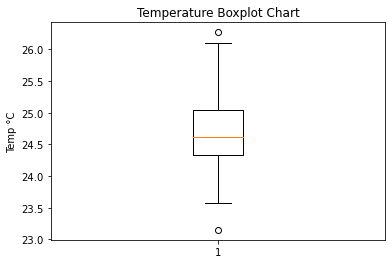

In [28]:
plt.boxplot(dakar_temp_val.avg_temp)
plt.title('Temperature Boxplot Chart')
plt.ylabel('Temp °C')

<a id="4.1"></a>
## <span style="color:#e76f51;"> Distribution Chart </span>

Text(0, 0.5, 'Number of counts')

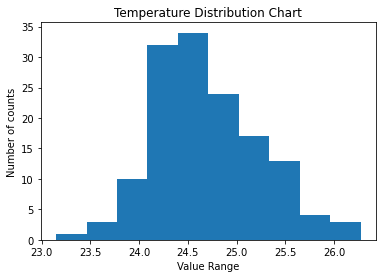

In [29]:
plt.hist(x=dakar_temp_val.avg_temp)
plt.title('Temperature Distribution Chart')
plt.xlabel('Value Range')

plt.ylabel('Number of counts')

<a id="4.1"></a>
## <span style="color:#e76f51;"> Dakar Temp MA </span>

Text(0, 0.5, 'Temp °C')

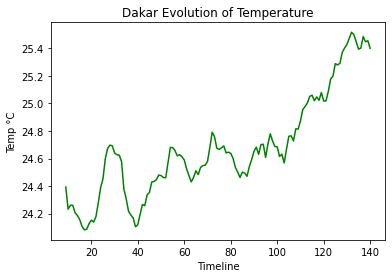

In [30]:
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.title('Dakar Evolution of Temperature')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')

<a id="4.1"></a>
## <span style="color:#e76f51;"> Global Temp MA </span>

Text(0, 0.5, 'Temp °C')

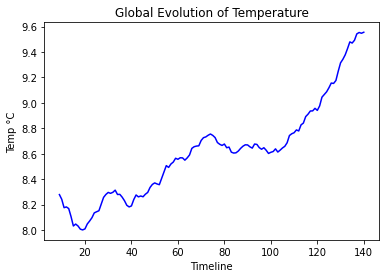

In [31]:
plt.plot(dakar_temp_val.global_rolling_temp, color='blue')
plt.title('Global Evolution of Temperature')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')

<a id="4.1"></a>
## <span style="color:#e76f51;"> Global and Dakar Temp MA </span>

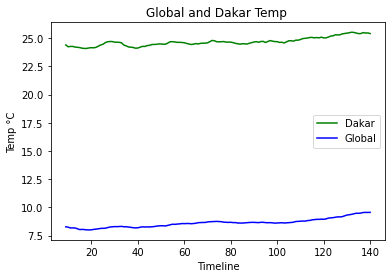

In [32]:
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(dakar_temp_val.global_rolling_temp, color='blue')
plt.title('Global and Dakar Temp ')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')
plt.legend(['Dakar','Global'])

<a id="4.1"></a>
## <span style="color:#e76f51;"> Global and Dakar Temp sup MA </span>

In [33]:
sup = dakar_temp_val.rolling_temp.mean()/dakar_temp_val.global_rolling_temp.mean()
sup

2.864474103158143

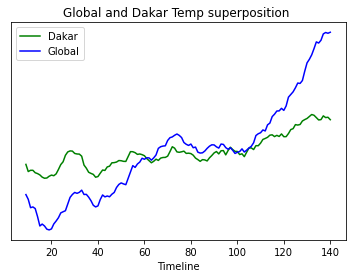

In [34]:
figure = plt.gca()
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(dakar_temp_val.global_rolling_temp*sup, color='blue')
plt.title('Global and Dakar Temp superposition ')
plt.xlabel('Timeline')
plt.legend(['Dakar','Global'])
y_axis = figure.axes.get_yaxis()
y_axis.set_visible(False)

<a id="4.1"></a>
## <span style="color:#e76f51;"> Nouakchott Temp MA </span>

Text(0, 0.5, 'Temp °C')

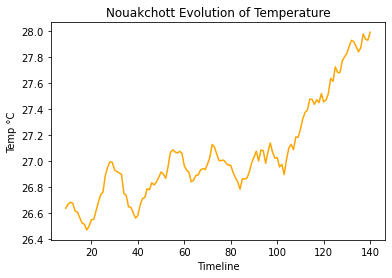

In [35]:
plt.plot(nouakchott_temp_val.rolling_temp,color='orange')
plt.title('Nouakchott Evolution of Temperature')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')

<a id="4.1"></a>
## <span style="color:#e76f51;"> Bamako Temp MA </span>

Text(0, 0.5, 'Temp °C')

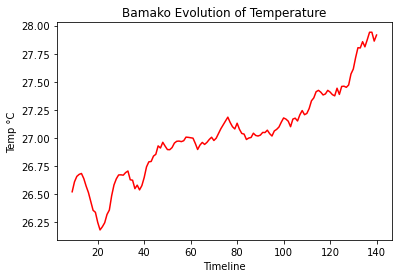

In [36]:
plt.plot(bamako_temp_val.rolling_temp,color='red')
plt.title('Bamako Evolution of Temperature')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')

<a id="4.1"></a>
## <span style="color:#e76f51;"> Bamako, Nouakchott and Dakar Temp MA </span>

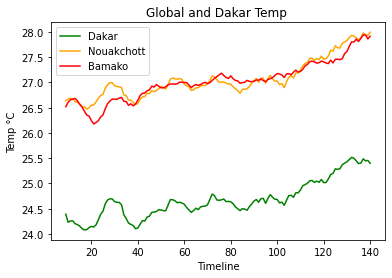

In [37]:
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(nouakchott_temp_val.rolling_temp,color='orange')
plt.plot(bamako_temp_val.rolling_temp,color='red')
plt.title('Global and Dakar Temp ')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')
plt.legend(['Dakar','Nouakchott','Bamako'])

<a id="4.1"></a>
## <span style="color:#e76f51;"> Global, Dakar, Nouakchott and Bamako Temp sup MA </span>

In [38]:
sup = ((dakar_temp_val.rolling_temp.mean()+bamako_temp_val.rolling_temp.mean()+nouakchott_temp_val.rolling_temp.mean())/3)/dakar_temp_val.global_rolling_temp.mean()
sup

3.0481452749236113

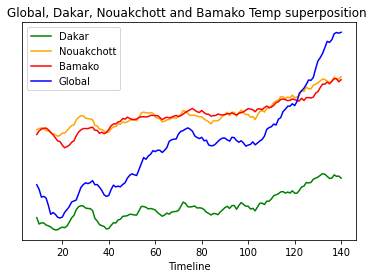

In [39]:
figure = plt.gca()
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(nouakchott_temp_val.rolling_temp,color='orange')
plt.plot(bamako_temp_val.rolling_temp,color='red')
plt.plot(dakar_temp_val.global_rolling_temp*sup, color='blue')
plt.title('Global, Dakar, Nouakchott and Bamako Temp superposition ')
plt.xlabel('Timeline')
plt.legend(['Dakar','Nouakchott','Bamako','Global'])
y_axis = figure.axes.get_yaxis()
y_axis.set_visible(False)

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Conclusion </span></center>**

**Based on the graph illustrating the average evolution of temperatures in Dakar and worldwide, we can answer certain questions**

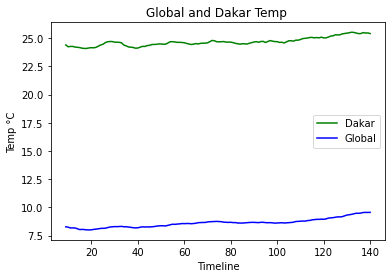

In [40]:
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(dakar_temp_val.global_rolling_temp, color='blue')
plt.title('Global and Dakar Temp ')
plt.xlabel('Timeline')
plt.ylabel('Temp °C')
plt.legend(['Dakar','Global'])

`Is my city hotter or cooler on average compared to the global average?`

**It can be seen that the average temperature in dakar is higher than the average temperature in the world. we therefore deduce that in dakar it is much warmer than worldwide.**

`Has the difference been consistent over time?`

**Yes, over time we see that the difference is constant.**

**Based on the superimposed graph, illustrating the curve of temperatures in dakar and on the world level, we can answer certain questions**

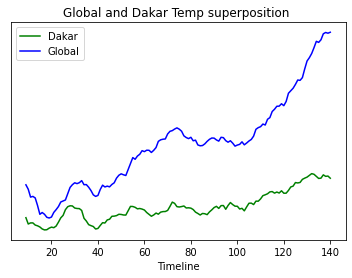

In [41]:
figure = plt.gca()
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(dakar_temp_val.global_rolling_temp*sup, color='blue')
plt.title('Global and Dakar Temp superposition ')
plt.xlabel('Timeline')
plt.legend(['Dakar','Global'])
y_axis = figure.axes.get_yaxis()
y_axis.set_visible(False)

`How do the changes in your city’s temperatures over time compare to the changes in the global average?`

**The tendency of the evolution of the climate on the modial plan is also observed on my city. on a curve which peaks more and more upwards. however global climate changes are much more accelerated than those of my cities which take off very little.**

**Based on the graph illustrating the average evolution of temperatures in Dakar, the city arround and worldwide, we can answer certain questions**

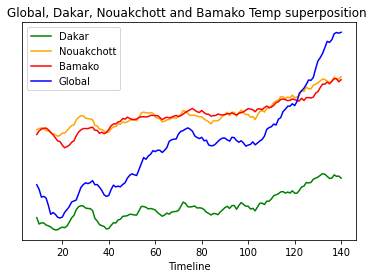

In [42]:
figure = plt.gca()
plt.plot(dakar_temp_val.rolling_temp, color='green')
plt.plot(nouakchott_temp_val.rolling_temp,color='orange')
plt.plot(bamako_temp_val.rolling_temp,color='red')
plt.plot(dakar_temp_val.global_rolling_temp*sup, color='blue')
plt.title('Global, Dakar, Nouakchott and Bamako Temp superposition ')
plt.xlabel('Timeline')
plt.legend(['Dakar','Nouakchott','Bamako','Global'])
y_axis = figure.axes.get_yaxis()
y_axis.set_visible(False)

`What does the overall trend look like?`

**In the cities around and in the world, we see that the temperatures are increasing. it is getting hotter and hotter.**

`Has the trend been consistent over the last few hundred years?`

**Over the last few centuries, the temperature has continued to grow, to be on the rise**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>